## Round 2 - Regression


<img src="../../../coursedata/R2_Regression/facades.jpg" alt="Drawing" style="width: 500px"/>

In this round, we consider machine learning (ML) problems that use the features of a data point to predict the value of a **numerical** label $y$. This type of machine learning problems are referred to as **regression problems**. For example, predicting the GPA of a student based on the amount of class attendance is a regression problem since the label (the GPA) is numerical.

We will apply some basic ML methods to solve a simple regression problem, in which the goal is to predict the median apartment value in different Helsinki neighborhoods. These methods aim at finding or learning a useful predictor function $h(\mathbf{x})$. Such a function allows us to predict the label $y$ of a data point based on the features $\mathbf{x}$. A wide range of machine learning methods is obtained by combining different predictor functions (hypothesis space) and loss function (the quality measure used to rank predictors). These different combinations offer different tradeoffs between **computational complexity, robustness (against perturbation of data), and accuracy**.  

## Learning Goals

After completing this round, you should

- know how to formulate "real-world" applications as a regression problem by identifying data points, their features, and labels  
- know how to represent features and labels of data points using matrices and vectors (as NumPy arrays)
- be able to apply ready-made regression methods to learn a useful predictor function from labeled data 
- evaluate the quality of linear regression methods that use different loss functions

## Background Material 

* [Video Lecture](https://www.youtube.com/watch?v=kHwlB_j7Hkc) on regression by [Prof. Andrew Ng](https://en.wikipedia.org/wiki/Andrew_Ng) 

* Additional information on the Python libraries used in this exercise can be found here:

 - [NumPy](http://cs231n.github.io/python-numpy-tutorial/)
 - [matplotlib](https://matplotlib.org/tutorials/index.html#introductory) 
 - [Images and Numpy Arrays](https://matplotlib.org/tutorials/introductory/images.html)
 - [Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#min)
 - [Slicing numpy arrays](https://www.pythoninformer.com/python-libraries/numpy/index-and-slice/)

## The Problem 

Assume you have secured an internship at the Helsinki office of a real estate investment fund. You have been placed in the research team, and your first task is to develop a machine learning model for predicting the median home value in different Helsinki neighborhoods. 

The staff in your group have built a dataset containing features of 20 different neighborhoods. These features include the average number of rooms in the apartments, the percentage of buildings constructed before 1970 in the neighborhood, as well as eight experimental features designed by your colleagues in research. In addition, the fund's domain experts have valued a representative sample of apartments in each of the 20 neighborhoods and have arrived at a reliable estimate for the median apartment price in each one. This valuation has cost the fund a fortune, but the investment will pay off if your ML model can use this information to accurately predict the median apartment value of other neighborhoods at a negligible cost.

Let us model the problem of predicting the median home values as a machine learning problem. The data points in this problem are the different neighborhoods, and the label of these is the median apartment price. The features of the neighborhoods were already explicitly referred to in the previous paragraph. Still, it might be worth repeating that the features are properties belonging specifically to the data points.

Notice that the setting of this problem is typical - the features of the data points are relatively easy to acquire, whereas, for the labels, it is difficult and costly. Thus, there is a lot of potential value in an ML model that can accurately predict the label of data points based on the features.

Finally, we observe that this ML problem is a **regression problem** since the median house price is numerical. This means that we must use ML methods suitable for regression to solve this task. We will soon consider such methods in more detail, but let us first examine the dataset.

## The Data

Our goal is to solve the aforementioned prediction problem by applying a machine learning model from the Scikit-learn library to predict the median apartment value. In order to do this, we must have some data on which to train the model. Below, we first briefly recap the mathematic representation of the dataset, after which we load the dataset into the Python environment so that it can be used in Scikit-learn.

Recall that a labelled dataset with $m$ data points and $n$ features consists of data points $\big(\mathbf{x}^{(1)}, y^{(1)}\big), \big(\mathbf{x}^{(2)}, y^{(2)}\big), \ldots, \big(\mathbf{x}^{(m)}, y^{(m)}\big)$, where $\mathbf{x}^{(i)} = \big(x_1^{(i)}, x_2^{(i)}, \ldots, x_n^{(i)} \big)^T$ is the feature vector that characterizes the $i$:th data point and $y^{(i)}$ is the label of that data point. For convenience, we store the feature vectors of the dataset in a **feature matrix** $\mathbf{X}$, in which the $i$:th row contains the feature vector of the $i$:th data point:


\begin{equation}
  \mathbf{X} = \begin{pmatrix}
                  \mathbf{x}^{(1)} & \mathbf{x}^{(2)} & \ldots & \mathbf{x}^{(m)}
               \end{pmatrix}^T 
             = \begin{pmatrix}
                  x_1^{(1)} & x_2^{(1)} & \ldots & x_n^{(1)} \\
                  x_1^{(2)} & x_2^{(2)} & \ldots & x_n^{(2)} \\
                  \vdots & \vdots & \ddots & \vdots \\
                  x_1^{(m)} & x_2^{(m)} & \ldots & x_n^{(m)}
               \end{pmatrix} \in \mathbb{R}^{m \times n}
\end{equation}

Furthermore, we store the labels of the data points in a separate **label vector** $\mathbf{y}$, which is a column vector where the $i$:th row contains the label of the $i$:th data point:

\begin{equation}
  \mathbf{y} = \begin{pmatrix}
                  {y}^{(1)} \\ {y}^{(2)} \\ \vdots \\ {y}^{(m)} 
               \end{pmatrix} \in \mathbb{R}^m
\end{equation}

In NumPy, we define the feature matrix as a 2-dimensional `ndarray` of shape `(m,n)`. That is, it has `m` rows (data points) and `n` columns (features). This is also the structure of the feature matrix that is assumed by the methods in Scikit-learn. 

If we were to apply the mathematical formulation fully in NumPy, we would define the label vector as a 2-dimensional `ndarray` of shape `(m,1)` that corresponds to a column vector. However, most methods in Scikit-learn operate under the assumption that the label vector is a 1-dimensional `ndarray` of shape `(m,)`, so we will adopt this practice instead.

<a id='handsondata'></a>
<div class=" alert alert-info">
    
    
### Demo. Load the data.
    
In the code snippet below, we create a function for loading the feature matrix `X` and label vector `y` for the apartment value problem. The function returns the feature matrix `X` of shape `(m,n)` and the label vector `y` of shape `(m,)`.
    
In most cases, it is not necessary to create a separate function for loading the data if the procedure is this simple. However, it is convenient in this case as we will reload the data before many tasks to make sure that the dataset has not been modified. In case you would have modified the dataset by mistake, you could receive wrong answers on student tasks despite your solutions being correct.
    
At the end of the cell, we use the newly defined function to load the data and print the shape of the feature matrix and label vector.
</div>

In [2]:
# Import basic libraries needed in this round
import numpy as np 
import pandas as pd  
from matplotlib import pyplot as plt

def load_housing_data(m=20, n=10):
    df = pd.read_csv("helsinki_apartment_prices.csv", index_col=0)  # Load dataframe from csv
    
    # Extract feature matrix and label vector from dataframe
    X = df.iloc[:,:n].to_numpy()
    y = df.iloc[:,-1].to_numpy().reshape(-1)
    
    return X, y
    
# Load the housing data
X, y = load_housing_data()
print(X.shape, y.shape)

(20, 10) (20,)


## Visualize Data

Scatter plots visualize data points by representing them as "dots" in the two-dimensional plane. Scatter plots can help to develop an intuition for the relation between features and labels of data points. 


<a id='drawplot'></a>
<div class=" alert alert-info">
    
### Demo. Scatterplots of Features and Labels
    
In the code cell below, we plot scatterplots of the label $y$, representing the median value of apartments, against the first three features $x_1, x_2, x_3$ of the housing dataset. This enables us to discover relationships between the individual features and the label even before applying any machine learning models on the data.
</div>

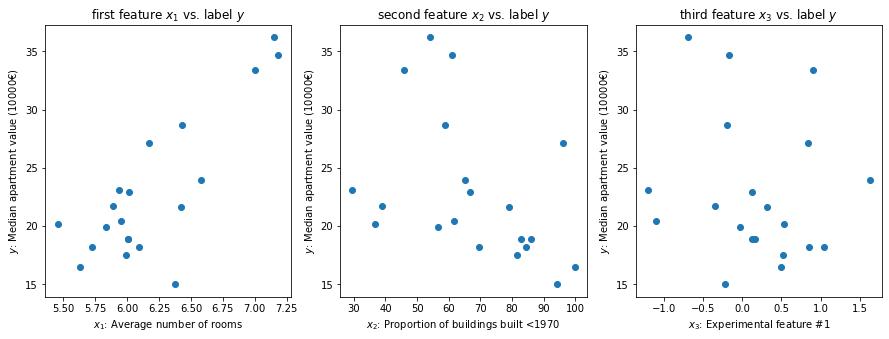

In [3]:
# Create a figure with 3 subplots in 1 row 
fig, ax = plt.subplots(1, 3, figsize=(15,5))

# Create first subplot 
ax[0].scatter(X[:,0], y)
ax[0].set_title('first feature $x_{1}$ vs. label $y$')
ax[0].set_xlabel('$x_{1}$: Average number of rooms')
ax[0].set_ylabel('$y$: Median apartment value (10000€)')

# Create second subplot 
ax[1].scatter(X[:,1], y)
ax[1].set_xlabel('$x_{2}$: Proportion of buildings built <1970')
ax[1].set_title('second feature $x_{2}$ vs. label $y$')
ax[1].set_ylabel('$y$: Median apartment value (10000€)')

# Create second subplot 
ax[2].scatter(X[:,2], y)
ax[2].set_xlabel('$x_{3}$: Experimental feature #1')
ax[2].set_title('third feature $x_{3}$ vs. label $y$')
ax[2].set_ylabel('$y$: Median apartment value (10000€)')

# Display the figure containing two subplots 
plt.show()

By looking at the scatterplots above, we can see that the median apartment value seems to be related to at least some of the features. As one would expect, the average number of rooms seems to be positively correlated with the median value. In contrast, the first experimental feature $x_3$ does not seem very informative. We can only hope that the research team has done a better job with the rest of the experimental features.

## Linear Regression 

As was discussed in round 1, it is infeasible to search for the best predictor function $h(\mathbf{x})$ from the space of all possible functions with arguments $\mathbf{x}$. Due to this, machine learning models typically restrict the set of candidate predictors to only contain functions of a certain form and parametrization. This restricted set of predictor functions is referred to as the **hypothesis space**.

In a **linear regression** model, the features $\mathbf{x}$ of a data point are assumed to be linearly related to the label $y$. That is, the predictor functions in the hypothesis space are of the form

\begin{equation*}
h^{(\mathbf{w})}(\mathbf{x}) = w_0 + \mathbf{w}^{T} \mathbf{x} = w_0 + \sum_{i=1}^n w_i x_i,
\tag{1}
\end{equation*}

where the feature coefficients $\mathbf{w}=\big(w_1, w_2, \ldots, w_n \big)^T$ and the intercept term $w_0$ are the model parameters. We can interpret the linear function as a weighted sum of the features $x_1, x_2, \ldots, x_n$, with weights $w_1, w_2, \ldots, w_n$ corresponding to each feature.

Now that we have defined the form of the functions in the hypothesis space, we want to fit the model by finding the predictor function that results in the best predictions on the training data. 

### Training a (linear) regression model by minimizing the average loss

A loss function $\mathcal{L}(\hat{y}, y)$ quantifies the quality of a single prediction $\hat{y}=h(\mathbf{x})$ by comparing it to the true label $y$ of a data point. The basic idea is that good predictions will only incur a small loss, whereas bad predictions will incur a large loss. 

Given a set of labelled data and a loss function, we can evaluate the fit of a predictor function on the dataset by calculating the **average loss** over all data points:

\begin{equation}
    \mathcal{E(h(\mathbf{x}))} = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(\hat{y}^{(i)}, {y}^{(i)})
\end{equation}

Since loss functions are defined so that worse predictions correspond to larger output values, the best predictor function in the hypothesis space is the one that minimizes the average loss over the training set.

For many regression models, including standard linear regression, the loss function of choice is the **squared error loss**

\begin{equation}
    \mathcal{L}(\hat{y}, y) = (y - \hat{y})^2.
\end{equation}

Thus, the average loss that is minimized when training a linear regression model is the **mean squared error** (MSE)

\begin{equation}
    \mathcal{E(h(\mathbf{x}))} = \frac{1}{m} \sum_{i=1}^m ({y}^{(i)} - \hat{y}^{(i)})^2 = \frac{1}{m} \sum_{i=1}^m ({y}^{(i)} - h(\mathbf{x}^{(i)}))^2 = \frac{1}{m} \sum_{i=1}^m ({y}^{(i)} - w_0 - \mathbf{w}^T\mathbf{x}^{(i)})^2.
\end{equation}

<a id='drawplot'></a>
<div class=" alert alert-info">
    
### Demo. Create and train a Linear regression model

In the code below, we create and train our first linear regression model on the housing data, using the `LinearRegression` class in Scikit-learn. Since we want to start out simple, and are, perhaps, a bit sceptical of the experimental features created by research, we will only use the first two features $x_1$ and $x_2$ in this model. As a reminder, these represent the average number of rooms in apartments and the percentage of buildings constructed before 1970.
    
The process of training a `LinearRegression` model is as follows:
    
- First, we create an instance of the `LinearRegression` class. This is done with the statement `LinearRegression()`. When creating this object, we can pass different parameters to the constructor that will affect the functionality of the model. For example, the parameter `fit_intercept` determines whether or not the model includes an intercept in its predictor functions.
    
    
- After creating the object and storing it in a variable `reg`, we train the model on the features `X` and labels `y` by calling the function `reg.fit(X, y)`. This function takes the feature matrix and label vectors as arguments, and calculates the optimal model parameters. The optimal regression weights (coefficients) are stored in the `.coef_` attribute of the object, and (optional) optimal intercept is stored in the `.intercept_` attribute.

    
You can find the documentation of the `LinearRegression` class under [this link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn-linear-model-linearregression). 

</div> 

In [4]:
from sklearn.linear_model import LinearRegression
from IPython.display import display, Math

# Load housing data with two features
X, y = load_housing_data(n=2)

# Create the linear regression object
reg = LinearRegression(fit_intercept=True) 

# Fit the linear regression model  
reg.fit(X, y)

# Get the optimal weight vector w of the fitted model 
w_opt = reg.coef_

# Reshape the numpy array to have dimension (n,1) 
w_opt = w_opt.reshape(-1,1)

# Print the optimal weight vector 
display(Math(r'$\mathbf{w}_{\rm opt} ='))
print(w_opt)

<IPython.core.display.Math object>

[[ 9.97587284]
 [-0.10507286]]


### The training error

After training the ML model on a dataset by minimizing the average loss, we often want to know how good the model's predictions are on the training data. The predictive performance of the model on the training data is measured by the **training error**. For regression models, the training error is typically defined as the MSE:

\begin{equation}
    \mathcal{E(h(\mathbf{x}))} = \frac{1}{m} \sum_{i=1}^m ({y}^{(i)} - \hat{y}^{(i)})^2 = \frac{1}{m} \sum_{i=1}^m ({y}^{(i)} - h(\mathbf{x}^{(i)}))^2.
\end{equation}

Even though the training error is equivalent to the average loss in the case of our model, they are not the same in general. The main difference between the two is that the average loss must always be a quantity that a learning algorithm can efficiently minimize with respect to the model parameters, while the training error is not subject to this requirement, and can be chosen more freely. In classification problems, for example, we are often interested in the accuracy of the model's predictions and thus define the training error as the accuracy. However, learning algorithms cannot efficiently minimize the accuracy with respect to the parameters, so we must instead choose a loss function whose average is efficiently minimizable during training. 

Let us now calculate the training error for the model above.

<a id='drawplot'></a>
<div class=" alert alert-info">
    
### Demo. Calculating the training error
    
In the following code, we train a linear regression model similarly to the previous demo and calculate the training error of the optimal predictor. After training the model, we calculate the training error using the following steps:
    
- First, we calculate the predicted labels of the data points in the training set by using the function `reg.predict(X)`. This function takes as input a feature matrix with `m` rows of data points and returns a vector of predicted labels of shape `(m,)`. In practice, the function calculates the predicted labels by applying a linear function on all data points, using the optimal weights and intercept that were found by calling the `.fit()` function.
    
    
- After obtaining the predicted labels `y_pred`, we calculate the training error by comparing the predictions to the true labels `y`. Since the training error is in this case defined as the MSE, we will use the `mean_squared_error(y, y_pred)` function from the `metrics` module in Scikit-learn to calculate it.

</div>

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
# Create a linear regression model
reg = LinearRegression(fit_intercept=True) 

# Train the model on the features X and label y
reg = reg.fit(X, y)

# Calculate the predicted labels of the data points in the training set
y_pred = reg.predict(X)

# Calculate the MSE of the true and predicted labels of the training set
training_error = mean_squared_error(y, y_pred)

# Print training error 
print("\nThe resulting mean squared error (training error) is ", training_error)


The resulting mean squared error (training error) is  7.693037221421173


We have now trained our first model on the dataset and obtained a value for the training error. Next, we might want to try out some other models on the dataset. By comparing the training errors of the optimal predictor of different models, we can find the model that fits the training data the best.

Your task below is to try out a set of models for median apartment value prediction that utilize a different number of features in the original dataset. In the context of this problem, it is of particular interest to examine if the inclusion of the experimental features developed by the research team results in better predictions on the training data.

<a id='varying_features'></a>
<div class=" alert alert-warning">
    
### Student Task. Varying the Number of Features. 
    
In this task, your objective is to train 10 different models that use the first $r$ features of the dataset, with $r$ ranging from 1 to 10. That is, you should first train a model on the data using only the feature $x_1$, then a model using the features $x_1,x_2$, and so forth, up until the model that uses all features $x_1,x_2,\ldots,x_{10}$. You should also calculate and store the training error for each model.
    
A more detailed description of the task is as follows. For each value of $r=1,\ldots,10$, you should
    
- Create a linear regression model with an intercept term (`fit_intercept=True`) and train the model on the data using only the $r$ first features. For example, if $r=4$, you should train the model using a feature matrix containing only the features $x_1,x_2,x_3,x_4$.
    
    
- Use the trained model to calculate the predicted labels `y_pred` of the dataset used for training the model. Notice that the feature matrix used for predicting labels must have the same number of features as the matrix used for training. 
    

- Calculate the mean squared error of `y_pred` in comparison to `y`, and store this error in the $r$th element of the array `linreg_error`. Remember that indexing starts at 0 in Python, so the $r$th element is found at index $r-1$ in the array.


The functions required for completing this task are presented in the previous demos. The new challenge is iterating over the different values of $r$, and figuring out how to modify the feature matrix to only contain the first $r$ features on each iteration.
    
**Hint:** Use a for loop to iterate over the number of features $r=1,\ldots,10$.
    
</div>

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error             

max_r = 10

# Load the dataset using 10 features 
X, y = load_housing_data(n=10)
  
# Vector for storing the training error of for each r
linreg_error = np.zeros(max_r)    

### STUDENT TASK ###
# Loop max_r times:
for r in range(1,max_r+1):

# Create a linear regression model
    reg = LinearRegression(fit_intercept=True) #  reg = ...

# Train the model on the features X and label y
    reg = reg.fit(X[:,:r], y) #  reg.xxx(...)

    y_pred = reg.predict(X[:,:r])
# Calculate the MSE of the true and predicted labels of the training set
    linreg_error[r-1] = mean_squared_error(y, y_pred) #  linreg_error[...] = ... 


# YOUR CODE HERE
#raise NotImplementedError()


In [7]:
# Perform some sanity checks on the result
assert linreg_error.shape == (max_r,), "'linreg_error' has the wrong shape."
assert linreg_error[9] < 0.8 * linreg_error[2], "training errors not correct"
assert linreg_error[5] > linreg_error[6], "training errors not correct"

print('Sanity check passed!')


Sanity check passed!


Next, we print and plot the training errors in order to assess how well the different models fit the data:

Training errors (rounded to 2 decimals): 
 [12.05  7.69  7.66  7.29  7.2   5.63  5.54  5.43  5.38  5.38]


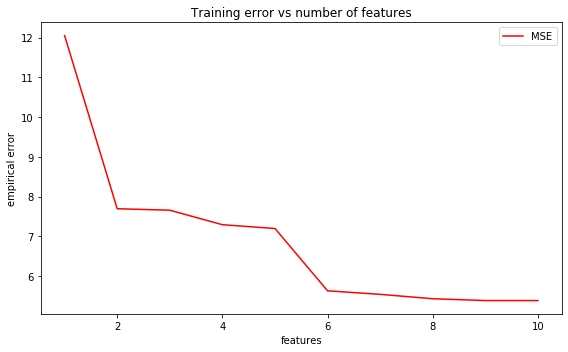

In [8]:
# Print the training errors
print(f"Training errors (rounded to 2 decimals): \n {np.round(linreg_error, 2)}")

# create a numpy array "r_values" containing the values 1,2...,max_r 
r_values = np.linspace(1, max_r, max_r, endpoint=True)
# create a plot object which can be accessed using variables "fig" and "axes"
fig, axes = plt.subplots(1,1, figsize=(8, 5))
# add a curve representing the average squared error for each choice of r 
axes.plot(r_values, linreg_error, label='MSE', color='red')
# add captions for the horizontal and vertical axes 
axes.set_xlabel('features')
axes.set_ylabel('empirical error')
# add a title to the plot 
axes.set_title('Training error vs number of features')
axes.legend()
plt.tight_layout()
plt.show()

If you have completed the task correctly, you should see plot similar to this one:

<img src="../../../coursedata/R2_Regression/numoffeatures.png" alt="Drawing" style="width: 500px"/>

As you can see, the training error is decreasing with respect to the number of features in the linear regression model. Based on this, it would seem that including the experimental features results in models that fit the training data better. In fact, the model with the best fit uses all of the 10 features in the original dataset.

You might want to conclude that this model is the best one for predicting the median apartment value of neighborhoods in Helsinki, and you might even be tempted to report this interpretation of the result to your supervisor at the fund! However, keep in mind that the actual purpose of the model is to predict the median apartment value of neighborhoods that are **not** in the training set. As such, a low error on the training set is not necessarily a reliable indicator of a good model.

As it turns out, good predictions on the training set do not necessarily correspond to good predictions on other data points. We will consider this in more detail in round 3, but you are encouraged to ponder about the reason for this by yourself in the time being!

Your next task is to explore the effect of using a different number of data points for training the model.

<a id='varying_features'></a>
<div class=" alert alert-warning">

### Student Task. Varying Number of Data Points.
    
In this task, your objective is to train 10 different models that use the $m$ first data points of the dataset, with $m$ ranging from 1 to 10. That is, you should first train a model on the data using only the data point $\mathbf{x}^{(1)}$, then a model using the data points $\mathbf{x}^{(1)},\mathbf{x}^{(2)}$, and so forth, up until the model that uses the 10 first data points $\mathbf{x}^{(1)},\mathbf{x}^{(2)},\ldots,\mathbf{x}^{(10)}$. You should also calculate and store the training error for each model in an array `train_error`.
    
The solution to this exercise is very similar to the one above, with the important difference that you are now varying the number of data points that you use to train the model on each iteration. This means that you must modify the feature matrix in a different manner to achieve the correct result.
    
</div>

In [9]:
# maximum number of data points
max_m = 10     

# Load the dataset using n=2 features 
X, y = load_housing_data(n=2)   

# Array in which to store the training errors of the different number of data points
train_error = np.zeros(max_m)

reg = LinearRegression(fit_intercept=True)

for r in range(1,max_r+1):

# Train the model on the features X and label y
    reg = reg.fit(X[:r,:], y[:r]) #  reg.xxx(...)

    y_pred = reg.predict(X[:r,:])
# Calculate the MSE of the true and predicted labels of the training set
    train_error[r-1] = mean_squared_error(y[:r], y_pred) #  linreg_error[...] = ... 

### STUDENT TASK ###
# YOUR CODE HERE
#raise NotImplementedError()

In [10]:
# Perform sanity checks on the results
assert train_error.shape == (10,), "'train_error' has wrong dimensions."
assert train_error[0] < 100 * train_error[3], "training errors not correct"
assert train_error[2] > train_error[1], "training errors not correct"

print('Sanity checks passed!')


Sanity checks passed!


Next, we print and plot the training errors in order to assess how well the different models fit the data:

Training Errors (Rounded to 2 decimals): 
 [0.   0.   0.   0.21 0.43 2.86 3.   7.63 6.87 6.72]


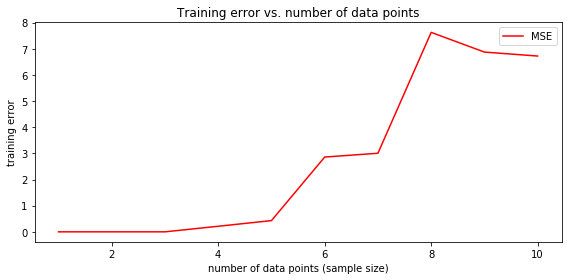

In [11]:
# Print training errors
print(f"Training Errors (Rounded to 2 decimals): \n {np.round(train_error, 2)}")

# create a numpy array "m_values" containing the values 1,2...,max_m
m_values = np.arange(1, max_m + 1)
# create a plot object which can be accessed using variables "fig" and "axes"
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
# add a curve representing the average squared error for each choice of m
axes.plot(m_values, train_error, label='MSE', color='red')
# add captions for axes of the plot 
axes.set_xlabel('number of data points (sample size)')
axes.set_ylabel('training error')
# add title for the plot 
axes.set_title('Training error vs. number of data points')
axes.legend()
plt.tight_layout()
# display the plot 
plt.show()

If you have completed the task correctly, you should see plot similar to this one:

<img src="../../../coursedata/R2_Regression/numofdatapoints.png" alt="Drawing" style="width: 500px"/>


As you can see, using more data points to fit a linear predictor results in an increasing training error. Why do you think increasing sample size leads to an increase in the training error?

## Using an alternative loss function 

We will now consider a machine learning model with the same hypothesis space as the standard linear regression model but a different loss function. In other words, the model still considers the family of linear functions as candidates for the optimal predictor, but the criteria for finding this predictor are different. The following scenario exemplifies a situation where such a model might be preferred over a standard linear regression model.

Suppose that the domain experts at the fund work very long hours, and are often tired when entering apartment valuation data into Excel. Sometimes the tiredness causes careless mistakes that result in abnormally high or low values for the median apartment value of some neighborhood. The resulting data points differ significantly from the intact data points and are called **outliers**.

Outliers in the data are often problematic, especially if they are the result of an error as in our example. This is due to the effect that the outliers may have on the optimal predictor of the ML model. 

<a id='drawplot'></a>
<div class=" alert alert-info">
    
### Demo. Loading corrupted data.

The code below provides a function that loads the housing dataset with only the feature $x_1$ and the label vector $y$. However, in this case the label vector that the function returns will be corrupted and contain an outlying value for the label of the first data point.

At the end of the cell we plot a scatterplot of the real and corrupted datasets in order to visualize the differences.
</div>

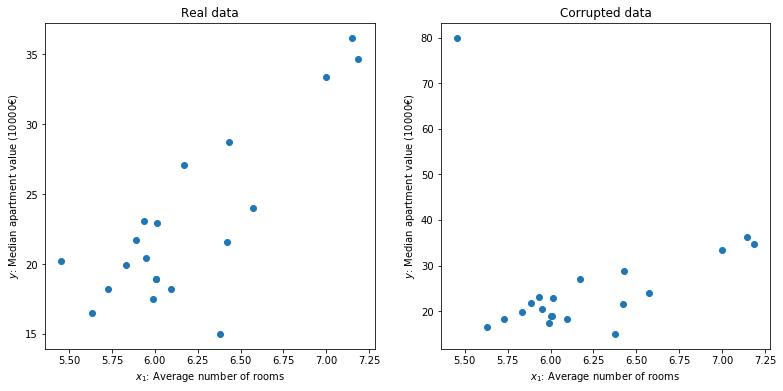

In [12]:
def load_corrupted_data():
    X, y = load_housing_data(n=1)
    
    # Perturb the label of the data points with lowest x_1
    y[np.argmin(X)] = 80
    
    return X, y

X, y = load_housing_data(n=1)
X_cor, y_cor = load_corrupted_data()

# Plot the real and the corrupted datasets for comparison
fig, ax = plt.subplots(1, 2,  figsize=(13,6))
ax[0].scatter(X, y)
ax[0].set_xlabel('$x_1$: Average number of rooms')
ax[0].set_ylabel("$y$: Median apartment value (10000€)")
ax[0].set_title("Real data")
ax[1].scatter(X_cor, y_cor)
ax[1].set_xlabel('$x_1$: Average number of rooms')
ax[1].set_ylabel("$y$: Median apartment value (10000€)")
ax[1].set_title("Corrupted data")
plt.show()

<a id='drawplot'></a>
<div class=" alert alert-info">
    
### Demo. (Non)Robustness of Linear Regression with Squared Error Loss.
    
The following code trains two linear regression models - one using the real data and one using the corrupted data. After training the models, the data is visualized along with the optimal predictor functions and prediction errors. This helps us assess if the erroneous data point in the corrupted data has a significant effect on the optimal predictor function that minimizes the MSE.
</div>

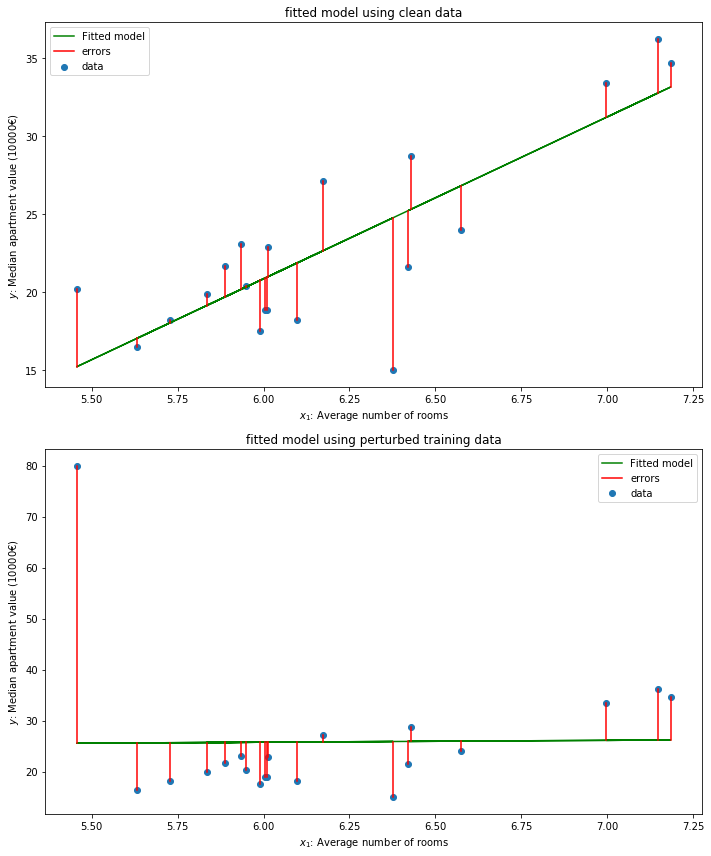

optimal weight w_opt by fitting to (training on) clean training data :  10.352233546854798
optimal weight w_opt by fitting to (training on) corrupted training data :  0.36741720196224564


In [13]:
# Fit a linear model to the real data 
reg = LinearRegression(fit_intercept=True)
reg = reg.fit(X, y)
y_pred = reg.predict(X)

# Fit a linear model on the corrupted data 
reg_cor = LinearRegression(fit_intercept=True)
reg_cor = reg_cor.fit(X_cor, y_cor)
y_pred_cor = reg_cor.predict(X_cor)

# Create a plot object which can be accessed using variables "fig" and "axes"
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
axes[0].scatter(X, y, label='data')  # Plot data points
axes[0].plot(X, y_pred, color='green', label='Fitted model')  # Plot linear predictor

# For each data point, add line indicating error
axes[0].plot((X[0], X[0]), (y[0], y_pred[0]), color='red', label='errors')  # Add label to legend
for i in range(len(X)-1):
    lineXdata = (X[i+1], X[i+1])  # Same X
    lineYdata = (y[i+1], y_pred[i+1])  # Different Y
    axes[0].plot(lineXdata, lineYdata, color='red')

# Set axes title, labels and legend
axes[0].set_title('fitted model using clean data')
axes[0].set_xlabel('$x_1$: Average number of rooms')
axes[0].set_ylabel("$y$: Median apartment value (10000€)")
axes[0].legend()

axes[1].scatter(X, y_cor, label='data')  # Plot data points 
axes[1].plot(X, y_pred_cor, color='green', label='Fitted model')  # Plot linear predictor

# now add individual line for each error point
axes[1].plot((X[0], X[0]), (y_cor[0], y_pred_cor[0]), color='red', label='errors')  # Add label to legend
for i in range(len(X)-1):
    lineXdata = (X[i+1], X[i+1])  # Same X
    lineYdata = (y_cor[i+1], y_pred_cor[i+1])  # Different Y
    axes[1].plot(lineXdata, lineYdata, color='red')

# set axes title, labels and legend
axes[1].set_title('fitted model using perturbed training data')
axes[1].set_xlabel('$x_1$: Average number of rooms')
axes[1].set_ylabel("$y$: Median apartment value (10000€)")
axes[1].legend()

fig.tight_layout()
plt.show()

print("optimal weight w_opt by fitting to (training on) clean training data : ", reg.coef_[0])
print("optimal weight w_opt by fitting to (training on) corrupted training data : ", reg_cor.coef_[0])

The figure above shows that the erroneous data point significantly affects the optimal predictor function obtained by minimizing the MSE. Due to this, the model trained on the corrupt data fails to approximate the real relationship between the features and the label, which will result in poor predictive performance on data points not in the training set.

One solution to this problem is to attempt to remove outliers from the data. Another approach that we will explore next is to use a loss function that is **robust to outliers**, i.e., the trained predictor is less affected by the outliers.

## Using a different loss function 

In the demo above, we observed that the resulting linear predictor is significantly affected by only a single corrupted data point. This sensitivity is due to the properties of the squared error loss used by the class `LinearRegression()`. By using the squared error loss $(\hat{y} - y)^{2}$, we force the predictor $\hat{y}$ to not be too far away from any data point. 
 
It turns out that using a different loss function to learn a linear predictor can make the learning robust against few outliers. One such loss function is known as the ["Huber loss"](https://en.wikipedia.org/wiki/Huber_loss) $\mathcal{L}(\hat{y},y)$, and is defined as 

\begin{equation}
\mathcal{L}(y,\hat{y}) = \begin{cases} (1/2) (y-\hat{y})^{2} & \mbox{ for } |y-\hat{y}| \leq   \varepsilon \\ 
\varepsilon(|y-\hat{y}| - \varepsilon/2) & \mbox{ else. }\end{cases}
\end{equation}

**The Huber loss is robust to outliers since the errors for which $|y - \hat{y}| > \varepsilon$ are not squared**. Thus, these data points have a smaller effect on the total loss over the dataset and hence the resulting fit. Note that the Huber loss contains a parameter $\epsilon$, which has to be adapted to the application at hand.

The Huber loss contains two important special cases. The first special case occurs when $\varepsilon$ is chosen to be very large (the precise value depending on the value range of the features and labels), such that the condition $|y-\hat{y}| \leq \varepsilon$ is always satisfied. In this case, the Huber loss is equivalent to the squared error loss $(y-\hat{y})^{2}$ (with an additional factor 1/2). The second special case occurs when $\varepsilon$ is very small (close to $0$) such that the condition $|y-\hat{y}| \leq \varepsilon$ is never satisfied. In this case, the Huber loss is equivalent to the absolute loss $|y - \hat{y}|$ scaled by a factor $\varepsilon$.

<img src="../../../coursedata/R2_Regression/huber1.png" alt="Drawing" style="width: 800px"/>

<a id='drawplot'></a>
<div class=" alert alert-info">

### Demo. Squared Error and Huber Loss
<p>
The code below plots the squared error loss and the Huber loss for different choices of the parameter $\varepsilon$. Note that the Huber loss reduces to the squared error loss for a sufficiently large value of the parameter $\varepsilon$.
</p>
</div>

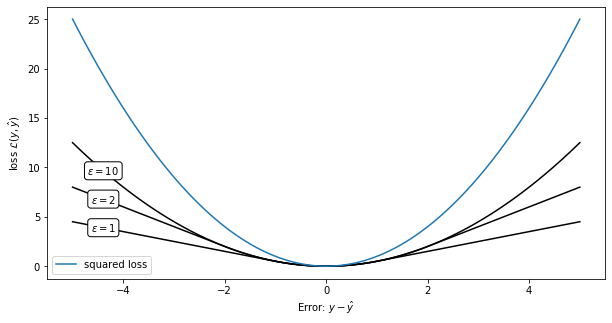

In [14]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
import matplotlib.pyplot as plt


#------------------------------------------------------------
# Define the Huber loss
def HuberLoss(pred_error, epsilon):
    # pred_error - prediction error y-y_pred
    # epsilon - parameter epsilon 𝜀 
    pred_error = abs(pred_error)
    flag = (pred_error > epsilon)
    return (~flag) * (0.5 * pred_error ** 2) - (flag) * epsilon * (0.5 * epsilon - pred_error)

#------------------------------------------------------------
# Plot for several values of epsilon
fig = plt.figure(figsize=(10, 5)) # set figure size
ax = fig.add_subplot(111) # add 1 subplot

pred_error = np.linspace(-5, 5, 100) # create linear space from -5 to 5 with 100 steps

for epsilon in (1, 2, 10): # loop through values 1, 2, 10
    loss = HuberLoss(pred_error, epsilon)
    ax.plot(pred_error, loss, '-k') # plot x and y

    if epsilon > 10:
        s = r'\infty' # set s to infinity sign (string format)
    else:
        s = str(epsilon) # set s to string of number epsilon

    ax.text(pred_error[6], loss[6], '$\epsilon=%s$' % s,
            ha='center', va='center',
            bbox=dict(boxstyle='round', ec='k', fc='w')) # add test to each line

ax.plot(pred_error, np.square(pred_error),label="squared loss") # plot the sqared loss (blue line)

ax.set_xlabel(r'Error: $y - \hat{y}$') # set x labels
ax.set_ylabel(r'loss $\mathcal{L}(y,\hat{y})$') # set y label
ax.legend() # show legend in plot
plt.show() # show the plot

<a id='drawplot'></a>
<div class=" alert alert-warning">
    
### Student task. Robustness of Linear Regression with Huber Loss.

In this task, your objective is to train separate Huber regression model on the original and corrupted data and use these models to calculate the predicted labels on the datasets. You should store the predicted labels for the model using the original data in the variable `y_pred`, and the predicted labels for the corrupted data in the variable `y_pred_cor`.
    
A Huber Regression model is implemented in the Scikit-learn class `HuberRegressor`. The methods of the `HuberRegressor` class are identical to the `LinearRegression` class, so training the models and calculating the predicted labels is done using the same functions.
</div>

In [30]:
from sklearn import linear_model
from sklearn.linear_model import HuberRegressor

X, y = load_housing_data(m=10,n=1)
X_cor, y_cor = load_corrupted_data()   # read in 10 data points with single feature x_1 and label y 

### STUDENT TASK ###
# reg = ...
# reg...
# y_pred = ...

reg = HuberRegressor(fit_intercept=True)
reg = reg.fit(X, y)
y_pred = reg.predict(X)

# reg_cor = ...
# reg_cor...
# y_pred_cor = ...
reg_cor = HuberRegressor(fit_intercept=True)
reg_cor = reg_cor.fit(X_cor, y_cor)
y_pred_cor = reg_cor.predict(X_cor)

# YOUR CODE HERE
#raise NotImplementedError()
#print(X.shape)
print("optimal weight w_opt by fitting on clean data : ", reg.coef_[0])
print("optimal weight w_opt by fitting on perturbed data : ", reg_cor.coef_[0])

optimal weight w_opt by fitting on clean data :  10.988807856687773
optimal weight w_opt by fitting on perturbed data :  10.98880425650738


In [31]:
# Perform some sanity checks on the output
assert y_pred.shape == (20,), "The shape of y_pred is wrong!"
assert y_pred_cor.shape == (20,), "The shape of y_pred_cor is wrong!"

print("Sanity checks passed!")


Sanity checks passed!


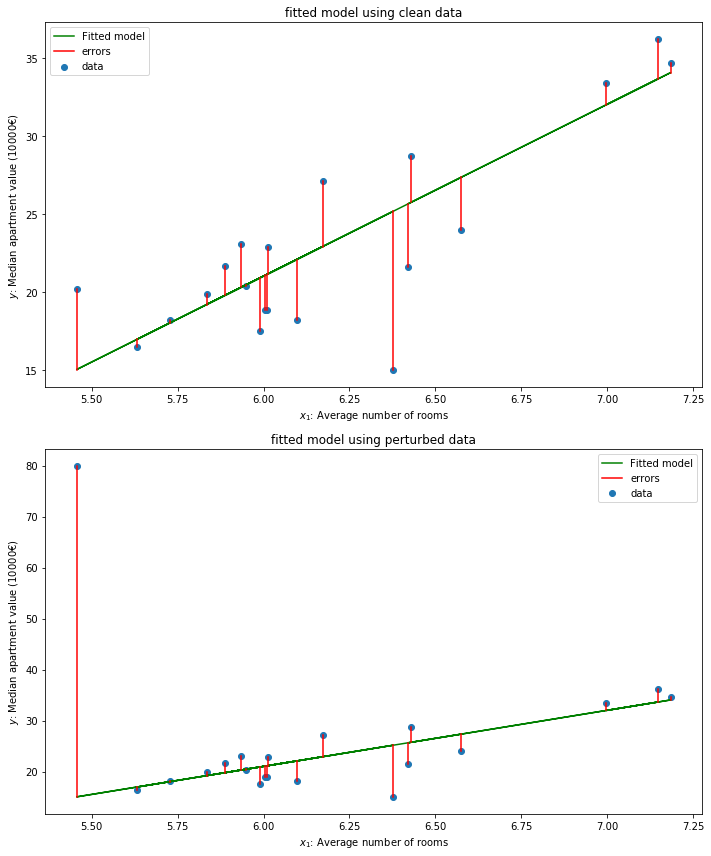

In [32]:
# create a plot object which can be accessed using variables "fig" and "axes"
fig, axes = plt.subplots(2, 1, figsize=(10,12))
# plot datapoints
axes[0].scatter(X, y, label='data')
# plot linear predictor
axes[0].plot(X, y_pred, color='green', label='Fitted model')

# now add individual line for each error point
axes[0].plot((X[0], X[0]), (y[0], y_pred[0]), color='red', label='errors') # add label to legend
for i in range(len(X)-1):
    lineXdata = (X[i+1], X[i+1]) # same X
    lineYdata = (y[i+1], y_pred[i+1]) # different Y
    axes[0].plot(lineXdata, lineYdata, color='red')

# set axes title, labels and legend
axes[0].set_title('fitted model using clean data')
axes[0].set_xlabel('$x_1$: Average number of rooms')
axes[0].set_ylabel("$y$: Median apartment value (10000€)")
axes[0].legend()

axes[1].scatter(X, y_cor, label='data')
# plot linear predictor
axes[1].plot(X, y_pred_cor, color='green', label='Fitted model')

# now add individual line for each error point
axes[1].plot((X[0], X[0]), (y_cor[0], y_pred_cor[0]), color='red', label='errors') # add label to legend
for i in range(len(X)-1):
    lineXdata = (X[i+1], X[i+1]) # same X
    lineYdata = (y_cor[i+1], y_pred_cor[i+1]) # different Y
    axes[1].plot(lineXdata, lineYdata, color='red')

# set axes title, labels and legend
axes[1].set_title('fitted model using perturbed data')
axes[1].set_xlabel('$x_1$: Average number of rooms')
axes[1].set_ylabel("$y$: Median apartment value (10000€)")
axes[1].legend()

fig.tight_layout()
plt.show()

We can see that the predictors trained on the original and perturbed data are very similar when using the Huber loss, in contrast to the large difference in the predictors that minimize the mean-squared error.

## Key takeaways

- In a **regression problem**, we are interested in predicting the value of a numerical label $y$ of data points based on their features $\mathbf{x}$


- A simple and commonly used regression model is **linear regression**. When applying linear regression, we model the relationship between the features and label as a linear function $\hat{y} = h(\mathbf{x}) = w_1x_1 + w_2x_2 + \ldots + w_nx_n$, whose optimal parameter values $\mathbf{w} = (w_1, w_2, \ldots, w_n)$ are learned from the data by minimizing the **mean squared error** (MSE)


- The **training error** measures the difference between the true labels $y$ and the predicted labels $\hat{y}$ outputted by an ML model on the dataset used for training the model. There are many possible metrics with which to measure this difference, but in the context regression problems the most widely used one is the MSE

\begin{equation}
    \mathcal{E}(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2.
\end{equation}


- Sometimes, we have a reason to use another loss function than the squared error loss. One example of this is when we want the trained model to be robust to outliers. In this case, we can use the Huber Loss instead, defined as 

\begin{equation}
\mathcal{L}(y,\hat{y}) = \begin{cases} (1/2) (y-\hat{y})^{2} & \mbox{ for } |y-\hat{y}| \leq   \varepsilon \\ 
\varepsilon(|y-\hat{y}| - \varepsilon/2) & \mbox{ else. }\end{cases}
\end{equation}

## Quiz Questions

<a id='QuestionR2_1'></a>
<div class=" alert alert-warning">
    <p><b>Student Task.</b> Question R2.1. </p>

 <p>When is a machine learning problem called a regression problem ?</p>

<ol>
  <li> When the quantity of interest (the label) is a numeric quantity. </li>
  <li> When the data is stored in a spreadsheet.</li>
  <li> When the method uses audio data.  </li>
  <li> When the quantity of interest takes on only a finite number of different values (e.g. "-1","0" or "4").
</ol> 

</div>

In [33]:
### STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
answer_R2_Q1  = 1

# YOUR CODE HERE
#raise NotImplementedError()

In [34]:
# This cell is for tests

assert answer_R2_Q1 in [1,2,3,4], '"answer_R2_Q1" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


Sanity check tests passed!


<a id='QuestionR2_2'></a>
<div class=" alert alert-warning">
    <p><b>Student Task.</b> Question R2.2.</p>
    <p> What is the effect of using more features for learning (fitting) a linear predictor by minimizing the average squared error on training data?</p>
    <ol>
      <li> The training error increases. </li>
      <li> The training error decreases. </li>
      <li> The training error does not depend on the number of features. </li>
    </ol> 
</div>

In [36]:
### STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
answer_R2_Q2  = 2

# YOUR CODE HERE
#raise NotImplementedError()

In [37]:
# This cell is for tests

assert answer_R2_Q2 in [1,2,3], '"answer_R2_Q2" Value should be an integer between 1 and 3.'
print('Sanity check tests passed!')


Sanity check tests passed!


<a id='QuestionR2_4'></a>
<div class=" alert alert-warning">
    <p><b>Student Task.</b> Question R2.3.</p>
    <p> How does the resulting regression method differ when using either squared error or Huber loss?</p>
    <ol>
      <li> Using Huber loss makes the resulting method more robust against outliers, i.e., the learned predictor does not vary too much if the dataset includes a few outliers.  </li>
      <li> Using squared error loss makes the resulting method more robust against outliers.  </li>
    </ol> 
</div>

In [38]:
### STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
answer_R2_Q3  = 1

# YOUR CODE HERE
#raise NotImplementedError()

In [39]:
# This cell is for tests

assert answer_R2_Q3 in [1,2], '"answer_R2_Q3" Value should be an integer between 1 and 2.'
print('Sanity check tests passed!')


Sanity check tests passed!
